In [86]:
# Standard library imports.
import itertools
import json

# Related third party imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,6)


# Local application/library specific imports.


def get_mean(df):
    df_ = df.drop(labels=['h_list', 'switch_hpair_count'], axis=1)
    return df_ #.groupby(by=['static_simulation_name', 'vSDN_size'], as_index=False).mean()

# Analysing one file

In [87]:
network = '25_italy'

df = pd.read_json(f"../results/25_italy/static/2021-11-17-25_italy-ilp-acc-13.json")
df = get_mean(df)
df.latency_factor = df.latency_factor.round(2)

In [88]:
df.latency_factor.unique()

array([0.4, 0.5, 0.6])

In [94]:
for count in sorted(df['vSDN_count_ilp'].unique()):
    data = df.query('vSDN_count_ilp==@count')['acceptable_count']
    print(f"{count:3d} {data.mean():.1f} {data.std():.1f}")

  2 49.3 37.2
  5 50.4 38.1
 10 51.3 37.5
 20 53.6 36.3
 50 54.1 35.9
100 54.7 35.3
200 55.5 34.8


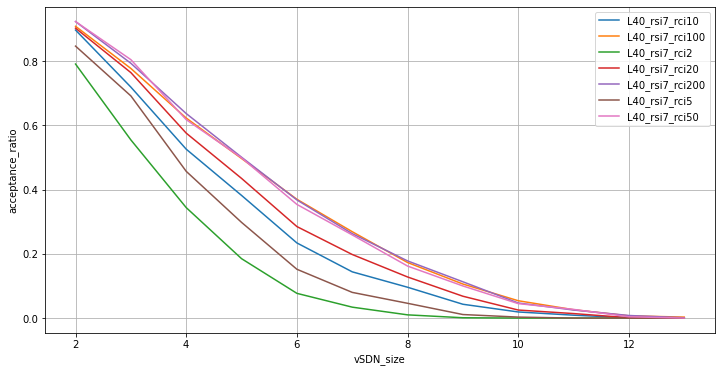

In [59]:
data = df.query('latency_factor==0.4')

for sim_name in data['static_simulation_name'].unique():
    sns.lineplot(x='vSDN_size', y='acceptance_ratio', data=data.query('static_simulation_name == @sim_name'), label=sim_name)

plt.legend()
plt.grid(True)

# Anaysing many files

In [95]:
dfs = {}
for i in list(range(2,8))+[13]:
    df = pd.read_json(f"../results/25_italy/static/2021-11-17-25_italy-ilp-acc-{i}.json")
    df = get_mean(df)
    df.latency_factor = df.latency_factor.round(2)
    df.vSDN_count_ilp = df.vSDN_count_ilp.astype(int)
    dfs[i] = df

In [96]:
for size,df in dfs.items():
    print(size)
    for count in sorted(df['vSDN_count_ilp'].unique()):
        data = df.query('vSDN_count_ilp==@count')['acceptable_count']
        print(f"  {count:3d} {data.mean():.1f} {data.std():.1f}")
    print()


2
    2 32.7 32.5
    5 34.8 37.4
   10 44.9 38.8
   20 41.2 38.8
   50 36.5 28.1
  100 44.7 36.4
  200 32.2 26.4

3
    2 29.9 30.1
    5 42.6 36.5
   10 37.9 38.3
   20 51.9 37.3
   50 42.7 29.9
  100 52.0 36.1
  200 52.3 36.0

4
    2 37.7 30.9
    5 46.8 36.2
   10 47.5 36.0
   20 52.7 36.0
   50 53.6 36.2
  100 53.8 35.0
  200 54.8 35.9

5
    2 37.0 31.9
    5 48.0 37.5
   10 51.1 36.6
   20 53.6 36.5
   50 55.4 35.3
  100 55.9 35.2
  200 55.7 35.4

6
    2 38.4 39.8
    5 48.8 37.2
   10 53.5 36.1
   20 53.0 36.4
   50 55.4 35.0
  100 55.6 35.1
  200 55.8 35.1

7
    2 39.5 31.3
    5 48.1 36.7
   10 50.9 37.1
   20 51.8 35.9
   50 55.8 34.8
  100 55.9 34.7
  200 56.1 34.8

13
    2 49.3 37.2
    5 50.4 38.1
   10 51.3 37.5
   20 53.6 36.3
   50 54.1 35.9
  100 54.7 35.3
  200 55.5 34.8



In [78]:
for size,df in dfs.items():
    print(size, end=' & ')
    for count in sorted(df['vSDN_count_ilp'].unique()):
        print(f"{df.query('vSDN_count_ilp==@count')['acceptable_count'].sum():.0f}", end=' & ')
    print()


2 & 1177 & 1251 & 1617 & 1484 & 1315 & 1611 & 1159 & 
3 & 1077 & 1534 & 1364 & 1867 & 1536 & 1871 & 1881 & 
4 & 1359 & 1684 & 1711 & 1896 & 1929 & 1937 & 1973 & 
5 & 1333 & 1727 & 1840 & 1928 & 1996 & 2012 & 2004 & 
6 & 1381 & 1756 & 1926 & 1907 & 1995 & 2003 & 2010 & 
7 & 1422 & 1733 & 1833 & 1865 & 2008 & 2014 & 2021 & 
13 & 1774 & 1815 & 1848 & 1931 & 1946 & 1968 & 2000 & 


In [83]:
for size,df in dfs.items():
    print(size, end=' & ')
    for count in sorted(df['vSDN_count_ilp'].unique()):
        print(f"{df.query('vSDN_count_ilp==@count')['acceptance_ratio'].var():.2f}", end=' & ')
    print()

2 & 0.11 & 0.13 & 0.16 & 0.16 & 0.11 & 0.14 & 0.11 & 
3 & 0.08 & 0.12 & 0.13 & 0.16 & 0.11 & 0.15 & 0.15 & 
4 & 0.09 & 0.13 & 0.12 & 0.15 & 0.15 & 0.14 & 0.15 & 
5 & 0.11 & 0.14 & 0.15 & 0.15 & 0.14 & 0.14 & 0.14 & 
6 & 0.18 & 0.14 & 0.15 & 0.15 & 0.14 & 0.14 & 0.14 & 
7 & 0.11 & 0.14 & 0.15 & 0.14 & 0.14 & 0.13 & 0.13 & 
13 & 0.14 & 0.16 & 0.16 & 0.14 & 0.14 & 0.14 & 0.13 & 


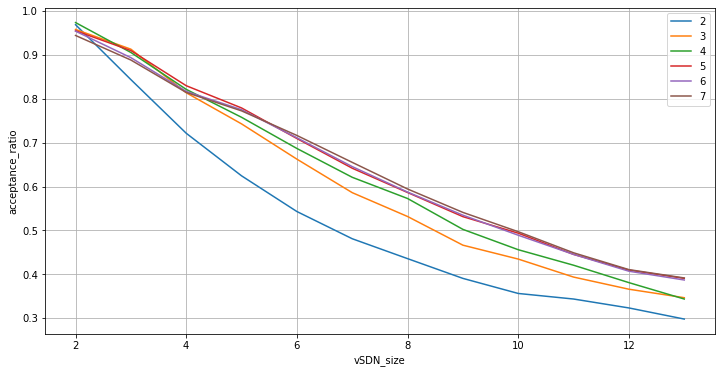

In [58]:
L = 0.4

for i,df in dfs.items():
    data = df.query('vSDN_count_ilp==100').groupby(by=['vSDN_size'], as_index=False).mean()
    sns.lineplot(x='vSDN_size', y='acceptance_ratio', data=data, label=i)

plt.legend()
plt.grid(True)

# Save file for Latex